# Takeaways (from bottom cell)
- Baseline is RGBA
- ~0x smaller: RGBA -> RGB   -- useless
- ~4x smaller: RGBA -> P,256 -- great quality, no concerns, let's go with this
- ~6x smaller: RGBA -> P,16  -- small but nonzero loss in quality, let's hold off on this until we measurably need it
- (P,16 vs. P,256 is ~25% smaller)
- optimize=True only saves ~5% space but adds cpu time, so let's hold off for now

Summary of output from bottom cell:
```
bytes  quality  mode  opt  bits  colors
---------------------------------------
41389    exact  RGBA    0     –     24m
39583    exact   RGB    0     –     16m
 9449     good     P    0     8     256
 9043     good     P    1     8     256
 6662       ok     P    0     4      16
 6547       ok     P    1     4      16
 2370      bad     P    1     4       8
```

In [ ]:
from notebooks import *
memory.log.level = 'debug'
cache_control(tags_refresh=['api/recs/rec_spectro_bytes'])
sg.init(None, skip=[sg_load.load_search_recs])

INFO     [18:53:30.356] [55700] 150 logging_/<module>: {logging_yaml: None}

INFO     [18:53:30.646] [55700]  32 api.server_globals/init

DEBUG    [18:53:30.652] [55700]  75 api.server_globals/load: load_search...

•

 api/server_globals/load_search(version=2)


INFO     [18:53:30.924] [55700]  79 api.server_globals/load: load_search (took 0.267s)

DEBUG    [18:53:30.931] [55700]  75 api.server_globals/load: load_xc_meta...

•

 api/server_globals/load_xc_meta(version=3)


INFO     [18:53:31.338] [55700]  79 api.server_globals/load: load_xc_meta (took 0.401s)

DEBUG    [18:53:31.345] [55700]  75 api.server_globals/load: load_feat_info...

INFO     [18:53:31.350] [55700] 110 api.server_globals/load_feat_info

INFO     [18:53:31.356] [55700]  79 api.server_globals/load: load_feat_info (took 0.006s)

WARNING  [18:53:31.362] [55700]  73 api.server_globals/load: load_search_recs [skipped]

INFO     [18:53:31.368] [55700]  34 api.server_globals/init: done

In [ ]:
get_search_recs.cache_clear()  # Clear @lru_cache
search_recs = get_search_recs(
    refresh=True,
)
display(search_recs
    [lambda df: [c for c in [
        'xc_id', 'id',
        'audio_bytes', 'audio_bytes_mimetype',
        'spectro_bytes', 'spectro_bytes_mimetype'
        'spectro_disp',
        'feat', 'f_preds',
    ] if c in df]]
    [2:3].reset_index(drop=True).T
    .pipe(df_assign_first,
        type=lambda df: df[0].map(lambda x: type(x).__name__),
        len=lambda df: df[0].map(lambda x: len(x) if hasattr(x, '__len__') else -1),
        # size=lambda df: df.T.memory_usage(deep=True),
        size=lambda df: df[0].map(lambda x: x.nbytes if hasattr(x, 'nbytes') else sys.getsizeof(x)),
    )
)

INFO     [18:53:31.521] [55700] 411 api.recs/get_search_recs

INFO     [18:53:31.534] [55700]  61 payloads/df_cache_hybrid: Miss: payloads/search_recs-version[2],limit[10],audio_s[10],countries_k[na],com_names_k[ca],num_recs[None]-d3ea255

DEBUG    [18:53:31.541] [55700]  64 payloads/df_cache_hybrid: Compute: search_recs [start]

INFO     [18:53:31.546] [55700] 468 api.recs/_compute_search_recs: {len(sg.xc_meta): 35233, countries_k: na, com_names_k: ca, num_recs: null}

DEBUG    [18:53:31.552] [55700] 495 api.recs/recs_featurize_pre_rank: batches (1/1) [start]

•

 api/recs/to_paths_sliced(version=0)


•

 load/recs(version=2)


•

 datasets/com_name_to_species_dict(version=0)


•

 sp14/model/feat(version=0)


f_preds: [

] |   0% (10) |  0.0s

f_preds: [

] |   0% (10) |  0.2s

f_preds: [

] |   0% (10) |  0.3s

•

 sp14/model/species_proba(version=2)


f_preds: [

########################################################################################

] | 100% (10) |  0.4s

DEBUG    [18:53:33.536] [55700] 714 api.recs/recs_featurize_spectro_bytes: [start]

rec_spectro_bytes:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


•

 api/recs/_rec_spectro_bytes(version=0)


rec_spectro_bytes: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 278.72it/s]

INFO     [18:53:33.585] [55700] 722 api.recs/recs_featurize_spectro_bytes: [0.049s]

DEBUG    [18:53:33.592] [55700] 789 api.recs/recs_featurize_audio_bytes: [start]

audio_bytes: [

] |   0% (10) |  0.0s

audio_bytes: [

####################################################################################

] | 100% (10) |  0.1s

INFO     [18:53:33.713] [55700] 793 api.recs/recs_featurize_audio_bytes: [0.122s]

INFO     [18:53:33.720] [55700] 495 api.recs/recs_featurize_pre_rank: batches (1/1) [2.168s]

INFO     [18:53:33.734] [55700]  67 payloads/df_cache_hybrid: Compute: search_recs [2.194s]

DEBUG    [18:53:33.741] [55700]  71 payloads/df_cache_hybrid: Miss: search_recs [start]

INFO     [18:53:33.766] [55700]  79 payloads/df_cache_hybrid: Miss: Inferred feat_cols['f_preds', 'feat']

DEBUG    [18:53:33.772] [55700]  82 payloads/df_cache_hybrid: Miss: Writing non_feats.parquet

INFO     [18:53:34.204] [55700]  87 payloads/df_cache_hybrid: Miss: Wrote non_feats.parquet (1.3 MB)

DEBUG    [18:53:34.213] [55700]  92 payloads/df_cache_hybrid: Miss: Writing feat-f_preds.npy: float32

INFO     [18:53:34.221] [55700]  94 payloads/df_cache_hybrid: Miss: Wrote feat-f_preds.npy: float32 (13.4 kB)

DEBUG    [18:53:34.228] [55700]  92 payloads/df_cache_hybrid: Miss: Writing feat-feat.npy: float32

INFO     [18:53:34.235] [55700]  94 payloads/df_cache_hybrid: Miss: Wrote feat-feat.npy: float32 (60.1 kB)

INFO     [18:53:34.242] [55700] 110 payloads/df_cache_hybrid: Miss: search_recs [0.501s]

,type,len,size,0
xc_id,int,-1,28,417610
id,str,128,177,"cache/audio/xc/data/TOSO/417610/audio.mp3.resample(22050,1,16).enc(wav).slice(0,10000).spectro_denoise().enc(mp4,libfdk_aac,32k)"
audio_bytes,bytes,42401,42434,"b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x00\x9f\x1dmdat\x01@""\x80\xa3} \x85----------------------------------------------------------..."
audio_bytes_mimetype,str,9,58,audio/mp4
spectro_bytes,bytes,62172,62205,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03`\x00\x00\x00(\x08\x06\x00\x00\x00\x98q\x998\x00\x00\xf2\xa3IDATx\x9c\xec\xfdgxU\xd7\x996\x8e\xdfk\xedS\xd4{/HH\x08\x84@\x8...
feat,ndarray,1500,6000,[ 6.140e-02 -2.948e-02 1.953e-02 -3.798e-02 2.723e-02 -2.374e-03 5.391e-02 -5.180e-02 1.074e-01 -2.686e-02 -1.881e-01 9.991e-02 -1.477e-02 -7.756e-02 9.021e-02 -1.45...
f_preds,ndarray,331,1324,[2.549e-03 1.458e-03 1.498e-04 1.324e-03 6.637e-04 2.818e-03 3.106e-03 1.472e-03 2.511e-03 4.366e-03 3.564e-04 9.183e-04 5.002e-03 9.269e-03 4.268e-03 2.612e-03 3.691e-04 ...


In [ ]:
(search_recs
    .pipe(df_col_map,
        audio_bytes=len,
        spectro_bytes=len,
        feat=lambda x: x.nbytes,
        f_preds=lambda x: x.nbytes,
    )
    [['audio_bytes', 'spectro_bytes', 'feat', 'f_preds']]
    .T
)

,0,1,2,3,4,5,6,7,8,9
audio_bytes,42386,42404,42401,42346,42458,42325,33288,42353,42500,42384
spectro_bytes,54810,50928,62172,53547,49683,44005,41389,53686,45814,50512
feat,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
f_preds,1324,1324,1324,1324,1324,1324,1324,1324,1324,1324


,xc_id,spectro_img
0,417557,
1,417549,
2,417610,
3,417559,
4,417728,
5,417729,
6,417621,
7,417620,
8,417550,
9,417551,

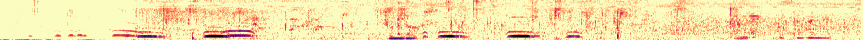
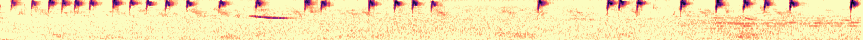
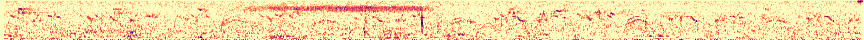
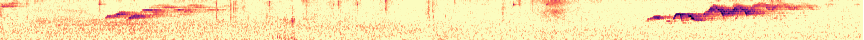
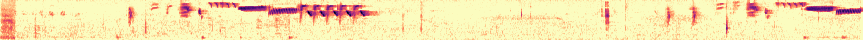
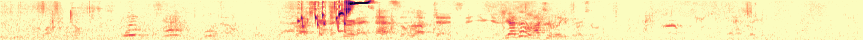
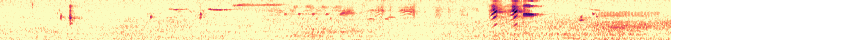
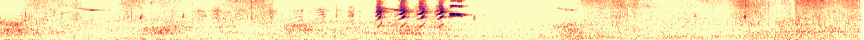
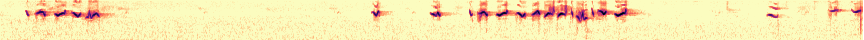
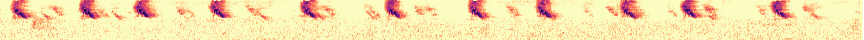

In [ ]:
(search_recs
    [:10]
    .assign(spectro_img=lambda df: df.spectro_bytes.map(lambda spectro_bytes: df_cell_display(
        pil_img_open_from_bytes(spectro_bytes)
    )))
    [['xc_id', 'spectro_img']]
)

In [ ]:
rec = (search_recs
    # .iloc[6]  # Uses alpha
    # .iloc[2]  # Doesn't use alpha
    .iloc[6]
)
spectro_bytes = rec.spectro_bytes
spectro_img = pil_img_open_from_bytes(spectro_bytes)
spectro_px = reduce(lambda x, y: x * y, spectro_img.size)
rows = []
for img, converts, format, save in [

    (spectro_img, '',          '',     ''),

    # (spectro_img, 'RGB',       'jpeg', dict()),  # Small, but junk
    # # (spectro_img, 'RGB',       'gif',  dict()),
    # (spectro_img, '',          'gif',  dict()),
    # (spectro_img, '',          'gif',  dict(optimize=True)),

    # (spectro_img, '1',         'png',  dict()),
    # (spectro_img, '',          'png',  dict()),
    (spectro_img, 'RGB',       'png',  dict()),
    (spectro_img, 'RGB',       'png',  dict(optimize=True)),
    # (spectro_img, '',          'png',  dict(optimize=True)),
    # (spectro_img, '',          'png',  dict(compress_level=6)),
    # (spectro_img, 'L',         'png',  dict()),
    # (spectro_img, 'P',         'png',  dict(optimize=True)),
    (spectro_img, 'P',         'png',  dict()),
    (spectro_img, ['RGB','P'], 'png',  dict()),
    (spectro_img, 'P',         'png',  dict(optimize=True)),
    (spectro_img, ['RGB','P'], 'png',  dict(optimize=True)),

    # https://en.wikipedia.org/wiki/Portable_Network_Graphics#Pixel_format
    #   - "The standard allows indexed color PNGs to have 1, 2, 4 or 8 bits per pixel."

    (spectro_img, dict(mode='P', colors=2),   'png',  dict()),  # [bad]  1b/px,   2 colors in palette
    (spectro_img, dict(mode='P', colors=4),   'png',  dict()),  # [bad]  2b/px,   4 colors in palette
    (spectro_img, dict(mode='P', colors=8),   'png',  dict()),  # [bad]  4b/px,   8 colors in palette
    (spectro_img, dict(mode='P', colors=16),  'png',  dict()),  # [ok]   4b/px,  16 colors in palette
    (spectro_img, dict(mode='P', colors=32),  'png',  dict()),  # [good] 8b/px,  32 colors in palette
    # (spectro_img, dict(mode='P', colors=64),  'png',  dict()),  # [good] 8b/px,  64 colors in palette
    # (spectro_img, dict(mode='P', colors=128), 'png',  dict()),  # [good] 8b/px, 128 colors in palette
    (spectro_img, dict(mode='P', colors=256), 'png',  dict()),  # [good] 8b/px, 256 colors in palette

    # (spectro_img, dict(mode='P', colors=2),   'png',  dict(bits=2)),  # [bad]  1b/px,   2 colors in palette
    # (spectro_img, dict(mode='P', colors=4),   'png',  dict(bits=2)),  # [bad]  2b/px,   4 colors in palette
    # (spectro_img, dict(mode='P', colors=8),   'png',  dict(bits=4)),  # [bad]  4b/px,   8 colors in palette
    (spectro_img, dict(mode='P', colors=16),  'png',  dict(bits=4)),  # [ok]   4b/px,  16 colors in palette
    (spectro_img, dict(mode='P', colors=32),  'png',  dict(bits=8)),  # [good] 8b/px,  32 colors in palette
    # (spectro_img, dict(mode='P', colors=64),  'png',  dict(bits=8)),  # [good] 8b/px,  64 colors in palette
    # (spectro_img, dict(mode='P', colors=128), 'png',  dict(bits=8)),  # [good] 8b/px, 128 colors in palette
    (spectro_img, dict(mode='P', colors=256), 'png',  dict(bits=8)),  # [good] 8b/px, 256 colors in palette

    # (spectro_img, dict(mode='P', colors=2),   'png',  dict(optimize=True)),
    # (spectro_img, dict(mode='P', colors=4),   'png',  dict(optimize=True)),
    # (spectro_img, dict(mode='P', colors=8),   'png',  dict(optimize=True)),
    (spectro_img, dict(mode='P', colors=16),  'png',  dict(optimize=True)),
    (spectro_img, dict(mode='P', colors=32),  'png',  dict(optimize=True)),
    (spectro_img, dict(mode='P', colors=256), 'png',  dict(optimize=True)),

    # (spectro_img, dict(mode='P', colors=2),   'png',  dict(optimize=True, bits=2)),
    # (spectro_img, dict(mode='P', colors=4),   'png',  dict(optimize=True, bits=2)),
    (spectro_img, dict(mode='P', colors=8),   'png',  dict(optimize=True, bits=4)),
    (spectro_img, dict(mode='P', colors=16),  'png',  dict(optimize=True, bits=4)),
    (spectro_img, dict(mode='P', colors=32),  'png',  dict(optimize=True, bits=8)),
    (spectro_img, dict(mode='P', colors=256), 'png',  dict(optimize=True, bits=8)),

]:
    label = (
        'bad'  if isinstance(converts, dict) and converts.get('mode') == 'P' and converts.get('colors', np.inf) <=   8 else
        'ok'   if isinstance(converts, dict) and converts.get('mode') == 'P' and converts.get('colors', np.inf) <=  16 else
        'good' if isinstance(converts, dict) and converts.get('mode') == 'P' and converts.get('colors', np.inf) <=  256 else
        'good' if converts in ['RGB', 'RGBA', 'P'] else
        '?'
    )

    for convert in converts if isinstance(converts, list) or not converts else [converts]:
        img = img.convert(**(convert if isinstance(convert, dict) else dict(mode=convert)))
    if format:
        b = pil_img_save_to_bytes(img, format=format, **save)
        img = pil_img_open_from_bytes(b)
    else:
        b = spectro_bytes
    input = 'INPUT' if img == spectro_img else ''
    scale = (
        1/3  # Height of text
        # 4
    )
    (h, w) = (img.size[1], int(img.size[0] / (
        # Increase to increase img height after scale stops working
        1
        # 1.9
    )))
    img_crop = img.crop((0, 0, w, h)).resize((int(w*scale), int(h*scale)))
    rows.append(OrderedDict(
        # i_*: input -> p_*: param -> o_*: output
        o_img_crop = df_cell_display(img_crop),
        input      = input,
        # o_palette  = (img.palette or '') and len(img.palette.palette) // 3,  # XXX Always says 256
        o_mode     = img.mode,
        o_bytes    = len(b),
        o_px_per_B = spectro_px / len(b),
        l_label    = label,
        p_opt      = save.get('optimize') if isinstance(save, dict) else None,
        p_bits     = save.get('bits') if isinstance(save, dict) else None,
        p_colors   = converts.get('colors') if isinstance(converts, dict) else None,
        p_converts = converts,
        p_format   = format,
        p_save     = save and yaml.safe_dump(save),
        i_mode     = spectro_img.mode,
    ))
df = (DF(rows)
    # .sort_values('o_px_per_B', ascending=False)
    .sort_values(['o_px_per_B', 'p_colors'], ascending=[False, False])
    # .sort_values(['p_colors', 'o_px_per_B'], ascending=[True, False])
    # .pipe(df_col_map, o_bytes=naturalsize)
    .pipe(df_col_map, o_px_per_B=lambda x: '%.1f' % x)
    .pipe(df_col_map, p_opt=lambda x: str(int(x)) if pd.notnull(x) else x)
    .pipe(df_col_map, p_bits=lambda x: str(int(x)) if pd.notnull(x) else x)
    .pipe(df_col_map, p_colors=lambda x: str(int(x)) if pd.notnull(x) else x)
    .pipe(df_col_color_d, p_format='tab10')
    .fillna('')
)
display(df)

,o_img_crop,input,o_mode,o_bytes,o_px_per_B,l_label,p_opt,p_bits,p_colors,p_converts,p_format,p_save,i_mode
7,,,P,1378,25.0,bad,,,2,"{'mode': 'P', 'colors': 2}",png,{},RGBA
19,,,P,2370,14.5,bad,1,4,8,"{'mode': 'P', 'colors': 8}",png,"{optimize: true, bits: 4}",RGBA
8,,,P,3305,10.4,bad,,,4,"{'mode': 'P', 'colors': 4}",png,{},RGBA
9,,,P,3817,9.0,bad,,,8,"{'mode': 'P', 'colors': 8}",png,{},RGBA
20,,,P,6547,5.3,ok,1,4,16,"{'mode': 'P', 'colors': 16}",png,"{optimize: true, bits: 4}",RGBA
13,,,P,6662,5.2,ok,,4,16,"{'mode': 'P', 'colors': 16}",png,{bits: 4},RGBA
16,,,P,8186,4.2,ok,1,,16,"{'mode': 'P', 'colors': 16}",png,{optimize: true},RGBA
10,,,P,8580,4.0,ok,,,16,"{'mode': 'P', 'colors': 16}",png,{},RGBA
18,,,P,9043,3.8,good,1,,256,"{'mode': 'P', 'colors': 256}",png,{optimize: true},RGBA
22,,,P,9043,3.8,good,1,8,256,"{'mode': 'P', 'colors': 256}",png,"{optimize: true, bits: 8}",RGBA
